In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Présentation de la problématique et importation des données
Évaluation de la probabilité de défaut de paiement pour les demandeurs de prêts,qui peut être soit 0 (non-défaut) soit 1 (défaut) : 

             *Étudiez comment les caractéristiques telles que l'âge, le revenu, le type de logement, l'ancienneté dans                                
             l'emploi,etc., influent sur la probabilité de défaut de paiement.
             
             *Développez des modèles de prédiction pour estimer la probabilité de défaut de paiement pour chaque
             demandeur de prêt en utilisant des techniques telles que la régression logistique ou les arbres de décision.
         

             

En abordant cette problématique, vous pourriez aider les prêteurs à mieux évaluer le risque de crédit et à prendre des décisions plus éclairées en matière d'octroi de prêts, ce qui pourrait contribuer à réduire les pertes liées aux défauts de paiement et à améliorer la rentabilité globale de leur portefeuille de prêts.


METHODE   | RAISON |     
--------------------|--------------------------------------------------------------------------------------|
 La régression logistique | choix courant pour la prédiction de probabilité dans les cas où la variable cible est binaire,   c'est-à-dire qu'elle a deux catégories possibles comme dans ce cas (défaut de crédit ou non-défaut).                  |      
 les arbres de décision  |  sont des modèles flexibles et interprétables qui peuvent capturer des relations non linéaires entre les variables. En segmentant l’espace des caractéristiques en sous-groupes homogènes, les arbres de décision peuvent identifier les interactions complexes entre les caracteristique des demendeurs et prédire la probabilite de défaut de manière précise.
 K-means et la CAH|  pour segmenter les emprunteurs en groupes homogènes, identifier des modèles cachés, et affiner les modèles prédictifs, améliorant ainsi la précision des prédictions du statut des prêts.


In [2]:
df = pd.read_csv("credit_risk.csv") #lire le jeu de données

In [3]:
df.head() #afficher les 5 premieres lignes

Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4

In [4]:
df.tail() #afficher les 5 dernieres lignes

Id  Age  Income      Home  Emp_length           Intent  Amount  \
32576  32576   57   53000  MORTGAGE         1.0         PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   
32578  32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000   
32579  32579   56  150000  MORTGAGE         5.0         PERSONAL   15000   
32580  32780   66   42000      RENT         2.0          MEDICAL    6475   

        Rate  Status  Percent_income Default  Cred_length  
32576  13.16       0            0.11       N           30  
32577   7.49       0            0.15       N           19  
32578  10.99       1            0.46       N           28  
32579  11.48       0            0.10       N           26  
32580   9.99       0            0.15       N           30

# Exploration et nettoyage des données

Avant de pouvoir utiliser les données pour entraîner nos modèles de prédiction de la probabilite de defaut d'un pret, nous devons les préparer de manière appropriée. La préparation des données comprend
plusieurs étapes essentielles pour garantir la qualité et la pertinence de nos analyses et de nos
modèles.
Tout d’abord, nous traitons les valeurs manquantes en les supprimant ou en les remplaçant
par des valeurs appropriées, selon le cas. Les données incomplètes peuvent fausser nos analyses
et nos modèles, il est donc crucial de les gérer de manière adéquate.
Ensuite, nous normalisons les données en les mettant à l’échelle pour qu’elles aient une
distribution standard. Cela garantit que les différentes variables ont des poids comparables lors
de l’entraînement des modèles et évite tout biais causé par des écarts d’échelle.
De plus, nous pourrions avoir besoin de convertir certaines variables catégorielles en variables
numériques, afin de les rendre compatibles
avec les algorithmes.

In [5]:
df.describe()  #description de jeu de données

Id           Age        Income    Emp_length        Amount  \
count  32581.000000  32581.000000  3.258100e+04  31686.000000  32581.000000   
mean   16290.006139     27.734600  6.607485e+04      4.789686   9589.371106   
std     9405.479594      6.348078  6.198312e+04      4.142630   6322.086646   
min        0.000000     20.000000  4.000000e+03      0.000000    500.000000   
25%     8145.000000     23.000000  3.850000e+04      2.000000   5000.000000   
50%    16290.000000     26.000000  5.500000e+04      4.000000   8000.000000   
75%    24435.000000     30.000000  7.920000e+04      7.000000  12200.000000   
max    32780.000000    144.000000  6.000000e+06    123.000000  35000.000000   

               Rate        Status  Percent_income   Cred_length  
count  29465.000000  32581.000000    32581.000000  32581.000000  
mean      11.011695      0.218164        0.170203      5.804211  
std        3.240459      0.413006        0.106782      4.055001  
min        5.420000      0.000000        0.000000      2.000000  
25%        7.900000      0.000000        0.090000      3.000000  
50%       10.990000      0.000000        0.150000      4.000000  
75%       13.470000      0.000000        0.230000      8.000000  
max       23.220000      1.000000        0.830000     30.000000

# Description des colonnes

# Les caractéristiques:

    - Age: Âge de l'individu demandant le prêt.
    - Income: Revenu annuel de l'individu.
    - Home: Type de propriété résidentielle de l'individu.
                       rent: L'individu loue actuellement une propriété.
                       mortgage: L'individu a une hypothèque sur la propriété qu'il possède.
                       own: L'individu possède sa maison sans hypothèque.
                       other: Autres catégories de propriété résidentielle qui peuvent être spécifiques au jeu de données.
    - Emp_length: Ancienneté professionnelle de l'individu en années.
    - Intent: L'intention derrière la demande de prêt.
    - Amount: Montant du prêt demandé par l'individu.
    - Rate: Taux d'intérêt associé au prêt.
    - Percent_income: Le pourcentage de revenu représenté par le montant du prêt.
    - default: Défaut historique de l'individu selon les enregistrements du bureau de crédit.
         * Y: L'individu a un historique de défauts dans son dossier de crédit.
         * N: L'individu n'a aucun historique de défauts.
    - Cred_length: La durée de l'historique de crédit pour l'individu.

Target (la variable cible):
    - Status: Statut du prêt, où 0 indique un non-défaut et 1 indique un défaut.
        0: Non-défaut - L'emprunteur a remboursé avec succès le prêt tel qu'accepté, et il n'y a pas eu de défaut.
        1: Défaut - L'emprunteur n'a pas réussi à rembourser le prêt selon les modalités convenues et a fait défaut sur le prêt.

 Élimination des Valeurs Manquantes: 

In [6]:
df.isnull().sum()   # calculer le nombre des valeurs manquantes dans notre jeu de données

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)   # supprimer les valeurs manquantes

In [8]:
df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

On voit bien que notre jeu de données ne contient pas des valeurs manquantes

In [9]:
print("Nombre de données dupliquées avant suppression :", df.duplicated().sum()) # Afficher le nombre de données dupliquées

Nombre de données dupliquées avant suppression : 0


Le nettoyage des données implique aussi de détecter et de supprimer les observations dupliquées pour garantir l'exactitude des analyses. notre jeu de données ne contient pas des veleurs dupliquées.

In [10]:
df['Status'].value_counts()

Status
0    22435
1     6203
Name: count, dtype: int64

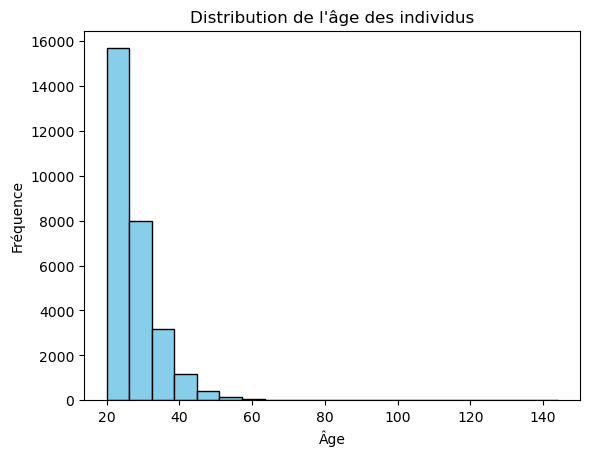

In [11]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'âge des individus')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

D'après le graphe, on constate que la majorité des personnes ayant entre 20 et 80 ans

In [12]:
df['Age'].value_counts()   # calculer le nombre d'occurences pour chaque valeur d'age.

Age
23     3413
22     3163
24     3130
25     2700
26     2201
27     1887
28     1624
29     1493
30     1126
21     1061
31     1008
32      860
33      758
34      625
35      559
36      482
37      409
38      321
39      270
40      236
41      218
42      165
43      142
44      116
45       91
46       86
47       76
48       65
50       45
49       41
52       33
51       33
53       26
54       21
55       18
58       17
57       15
56       14
20       14
60       13
61        8
66        8
64        7
62        6
69        5
70        5
59        5
65        5
144       3
63        3
73        2
78        1
123       1
80        1
84        1
76        1
67        1
Name: count, dtype: int64

In [13]:
nb_personnes_age_superieur_80 = sum(df['Age'] > 80)

print("Nombre de personnes dont l'âge est superieur à 80 :", nb_personnes_age_superieur_80)

Nombre de personnes dont l'âge est superieur à 80 : 5


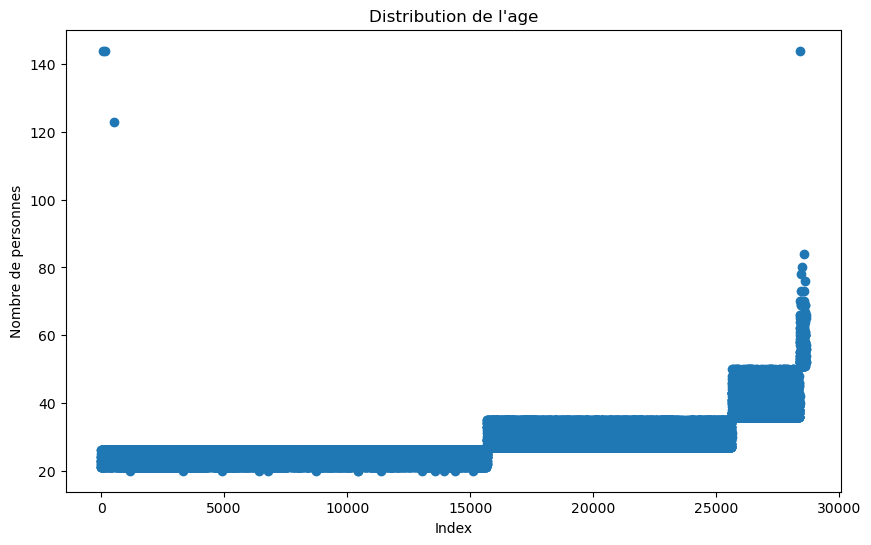

In [14]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Affichage des points
plt.scatter(range(len(df)), df['Age'])

# Définition du titre et des labels des axes
plt.title('Distribution de l\'age')
plt.xlabel('Index')
plt.ylabel('Nombre de personnes')

# Affichage
plt.show()

D'après ce graphe, on voit qu'il y a des valeurs abberentes après 80 ans, qui sont 5 d'après le code precedant

In [15]:
df = df.drop(df[df['Age'] > 80].index, axis=0)  # supprimer les personnes ayant plus de 80 ans.

Créer des groupes pour l'age des personnes:
L'ajout d'une colonne age_group dans le jeu de données permet de simplifier l'analyse en regroupant les âges en catégories distinctes, ce qui offre une vue d'ensemble claire de la répartition des âges. Cette approche réduit également la complexité des modèles d'apprentissage automatique en convertissant une variable continue en une variable catégorielle.

In [16]:
df['Age_group'] = pd.cut(df['Age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65']) #diviser les personnes selon l'age.

In [17]:
df.head()

Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length Age_group  
0            0.59       Y            3     20-25  
1            0.10       N            2     20-25  
2            0.57       N            3     20-25  
3            0.53       N            2     20-25  
4            0.55       Y            4     20-25

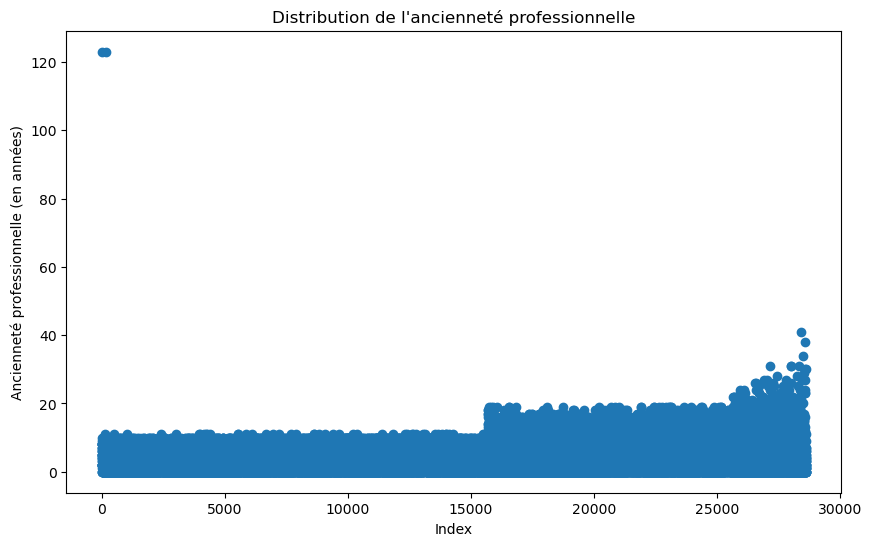

In [18]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Affichage des points
plt.scatter(range(len(df)), df['Emp_length'])

# Définition du titre et des labels des axes
plt.title('Distribution de l\'ancienneté professionnelle')
plt.xlabel('Index')
plt.ylabel('Ancienneté professionnelle (en années)')

# Affichage
plt.show()

D'après le graphe, on voit que après 40 ans de travail, il existe des valeurs abbérantes, donc il faut les supprimer

In [19]:
df['Emp_length'].value_counts()  # calculer le nombre de personnes pour chaque valeur d'ancienneté

Emp_length
0.0      3708
2.0      3467
3.0      3133
5.0      2715
1.0      2644
4.0      2569
6.0      2394
7.0      1971
8.0      1534
9.0      1227
11.0      663
10.0      631
12.0      518
13.0      380
14.0      306
15.0      213
16.0      152
17.0      115
18.0       96
19.0       61
20.0       36
21.0       33
22.0       18
23.0       10
24.0        8
25.0        8
27.0        5
26.0        4
31.0        4
28.0        2
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [20]:
n = sum(df['Emp_length'] >40)
print("Nombre de personnes qui travaille dans une durée supérieur à 40 :", n)

Nombre de personnes qui travaille dans une durée supérieur à 40 : 3


In [21]:
df = df.drop(df[df['Emp_length'] > 40].index, axis=0)  #supprimer les peronnes qui ont une ancienneté plus que 40 ans

In [22]:
df['income_group'] = pd.cut(df['Income'],
                              bins=[0, 50000, 100000, float('inf')],
                              labels=['low', 'middle', 'high'])  # créer des groupes en se basant sur le salaire annuel

In [23]:
df.head()

Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   

   Percent_income Default  Cred_length Age_group income_group  
1            0.10       N            2     20-25          low  
2            0.57       N            3     20-25          low  
3            0.53       N            2     20-25       middle  
4            0.55       Y            4     20-25       middle  
5            0.25       N            2     20-25          low

In [24]:
df = df.drop(['Id'], axis=1) #suppression de l'Id car il n'a pas d'intéret dans notre analyse

In [25]:
df.head()

Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   

   Percent_income Default  Cred_length Age_group income_group  
1            0.10       N            2     20-25          low  
2            0.57       N            3     20-25          low  
3            0.53       N            2     20-25       middle  
4            0.55       Y            4     20-25       middle  
5            0.25       N            2     20-25          low

# La corrélation entre les variables

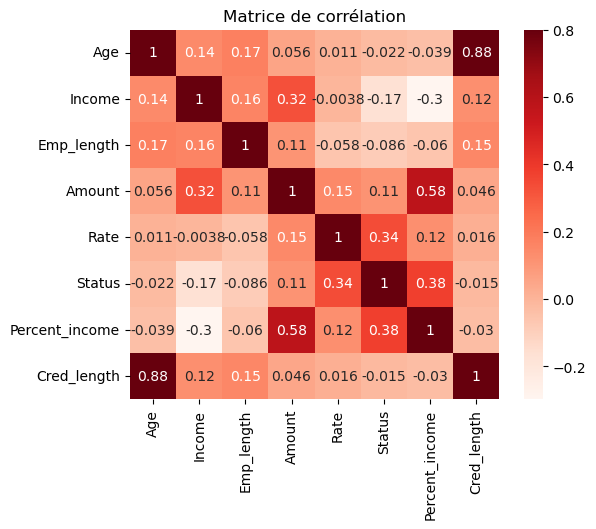

In [26]:
import seaborn as sns
# Corrélation entre les variables numériques
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, vmax =.8, square = True, annot = True,cmap='Reds')
plt.title('Matrice de corrélation')
plt.show()

Le signe négatif indique une relation inverse entre les deux variables(age , Emp_length,Cred_lengt, Icome). Cela signifie que, en général, à mesure que l'âge du demandeur et la dure et montant du pret augmente, la probabilité de remboursement du crédit tend à diminuer légèrement.  Le signe positif indique une relation directe entre les deux variables. Cela signifie que, en général, à mesure que le statut  augmente, le taux de défaut , Icome et Percent income du prêt a également tendance à augmenter.

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


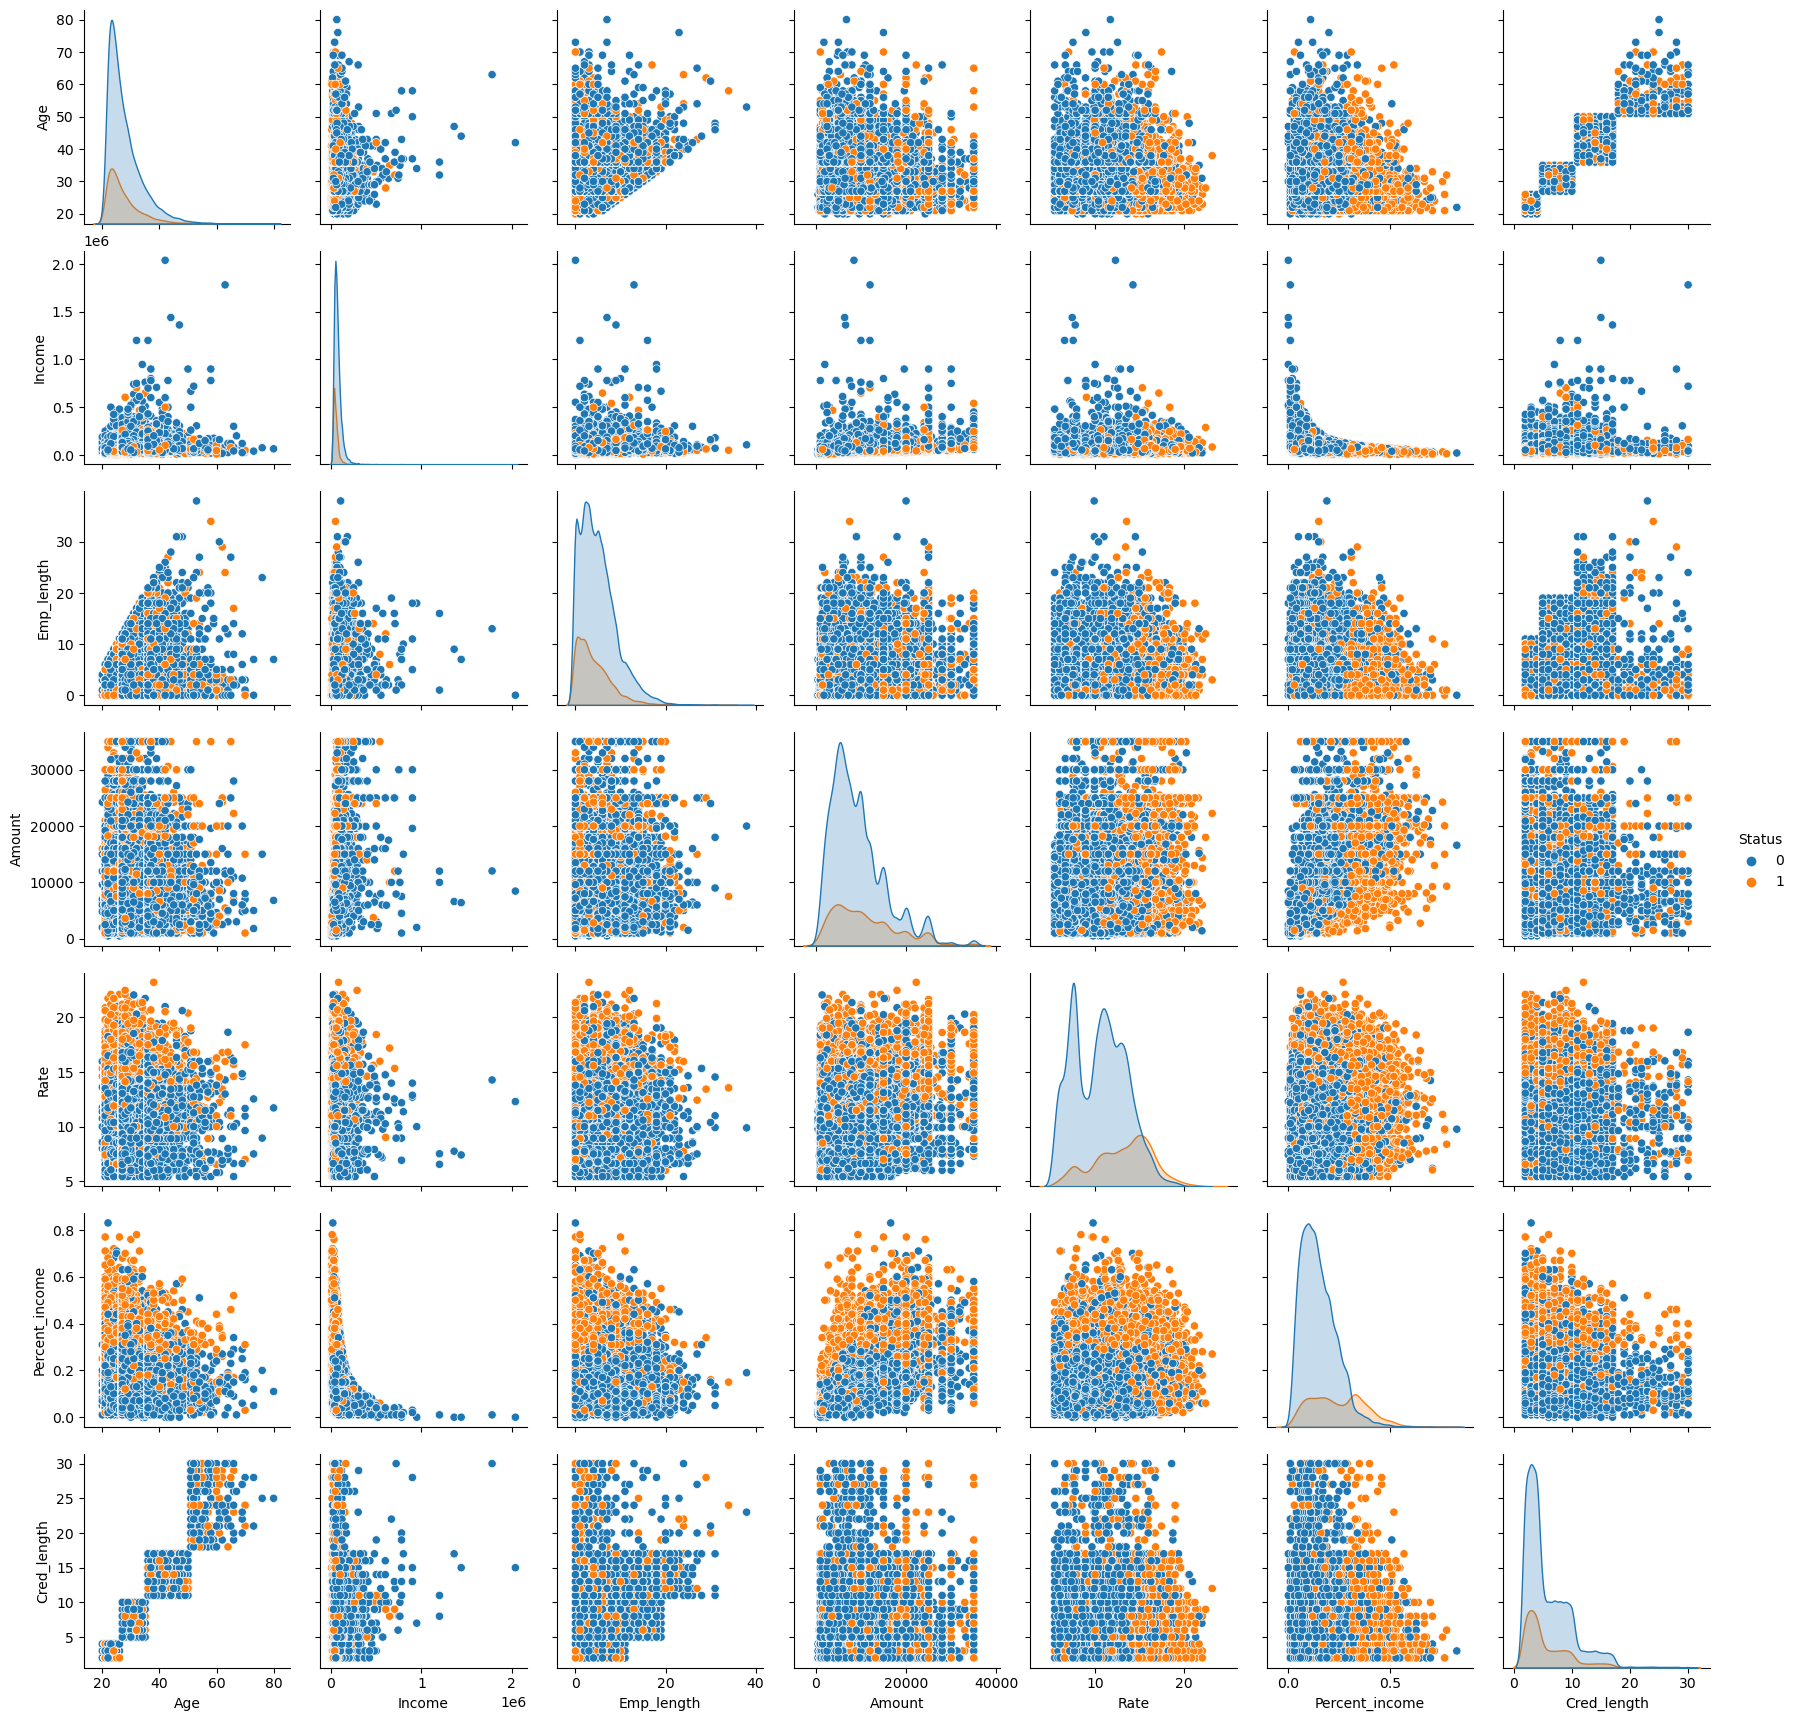

In [27]:
sns.pairplot(df,hue="Status")

# ACP

L'Analyse en Composantes Principales (ACP) est une technique d'analyse multivariée largement utilisée pour explorer et réduire la dimensionnalité des données en identifiant les structures sous-jacentes et en mettant en évidence les tendances. Dans notre cas elle nous aide a réduire la dimensionnalité de nos données tout en conservant la plupart de l'information ensemble de données comporte plusieurs variables telles que l'âge, le revenu, le montant du prêt, le taux d'intérêt, etc.


In [28]:
df.head()

Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   

   Percent_income Default  Cred_length Age_group income_group  
1            0.10       N            2     20-25          low  
2            0.57       N            3     20-25          low  
3            0.53       N            2     20-25       middle  
4            0.55       Y            4     20-25       middle  
5            0.25       N            2     20-25          low

In [29]:
from sklearn.preprocessing import LabelEncoder
# Créez une copie du DataFrame
df_copy = df.copy()

# Initialisez l'encodeur
label_encoder = LabelEncoder()

# Liste des variables catégorielles à encoder
variables_catégorielles = ['Home', 'Intent', 'Default', 'Age_group', 'income_group']

# Boucle sur chaque variable catégorielle et encodez-la
for variable in variables_catégorielles:
    # Créez une nouvelle colonne dans la copie du DataFrame avec le nom de la variable suivi de '_numerique'
    nom_nouvelle_colonne = variable + '_numerique'
    # Appliquez l'encodage sur la colonne catégorielle et assignez les valeurs encodées à la nouvelle colonne
    df_copy[nom_nouvelle_colonne] = label_encoder.fit_transform(df[variable])

# Affichez le DataFrame avec les nouvelles colonnes numériques
df_copy.head()


Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   
5   21    9900       OWN         2.0    VENTURE    2500   7.14       1   

   Percent_income Default  Cred_length Age_group income_group  Home_numerique  \
1            0.10       N            2     20-25          low               2   
2            0.57       N            3     20-25          low               0   
3            0.53       N            2     20-25       middle               3   
4            0.55       Y            4     20-25       middle               3   
5            0.25       N            2     20-25          low               2   

   Intent_numerique  Default_numerique  Age_group_numerique  \
1                 1                  0                    0   
2                 3                  0                    0   
3                 3                  0                    0   
4                 3                  1                    0   
5                 5                  0                    0   

   income_group_numerique  
1                       1  
2                       1  
3                       2  
4                       2  
5                       1

In [30]:
# Supprimez les colonnes catégorielles d'origine du DataFrame copié
df_copy.drop(columns=variables_catégorielles, inplace=True)

# Affichez le DataFrame sans les colonnes catégorielles
df_copy.head()
#df_copy.shape

Age  Income  Emp_length  Amount   Rate  Status  Percent_income  \
1   21    9600         5.0    1000  11.14       0            0.10   
2   25    9600         1.0    5500  12.87       1            0.57   
3   23   65500         4.0   35000  15.23       1            0.53   
4   24   54400         8.0   35000  14.27       1            0.55   
5   21    9900         2.0    2500   7.14       1            0.25   

   Cred_length  Home_numerique  Intent_numerique  Default_numerique  \
1            2               2                 1                  0   
2            3               0                 3                  0   
3            2               3                 3                  0   
4            4               3                 3                  1   
5            2               2                 5                  0   

   Age_group_numerique  income_group_numerique  
1                    0                       1  
2                    0                       1  
3                    0                       2  
4                    0                       2  
5                    0                       1

Pour chaque variable catégorielle d'origine (par exemple 'Home', 'Intent', 'Default', 'Age_group', 'income_group'), une nouvelle colonne a été ajoutée au DataFrame, contenant les valeurs encodées correspondantes.


In [31]:
#classe pour standardisation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# Sélectionner les caractéristiques pertinentes pour l'analyse PCA
X = df_copy.drop(columns=["Status"])
y = df_copy["Status"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données : normalisation des variables explicatives
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.28261521 -0.21958661  1.30149631 ... -0.46514178 -0.78196229
   0.99790122]
 [-0.93048399 -0.60314408  0.30633794 ...  2.14988212 -0.78196229
  -0.4522561 ]
 [-0.28261521 -0.29289687  1.30149631 ... -0.46514178 -0.78196229
   0.99790122]
 ...
 [-0.6065496  -0.35035006  0.05754834 ... -0.46514178 -0.78196229
  -0.4522561 ]
 [ 0.04131917  3.03938798  0.80391712 ...  2.14988212  0.59817675
  -1.90241342]
 [ 0.36525356  0.98064878 -0.44003084 ... -0.46514178  0.59817675
  -1.90241342]]


es données normalisées affichées sont les données d'entraînement après avoir été normalisées. Chaque nombre représente la valeur normalisée d'une caractéristique pour une observation donnée

Appliquer La PCA

In [32]:
# Analyse en Composantes Principales
pca = PCA(n_components=0.95)  # Choisir le nombre de composantes pour expliquer 95% de la variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca)

[[-0.67505607 -0.4406965   0.25339114 ... -0.38308683  0.09186469
  -1.87011116]
 [-1.3985649   0.96138835 -1.30762451 ... -1.11703674  0.23225479
   0.06566048]
 [-0.82070937 -0.59821094 -0.64053855 ... -0.74273919  1.47537701
  -0.58744854]
 ...
 [-1.3467592   0.89403462  0.90825959 ... -0.61894296  0.3145427
   1.00877537]
 [ 1.2326417   0.62954825  2.96451333 ...  0.12158028  0.00810642
   0.83410263]
 [ 0.98856129 -0.65351231  1.95351457 ...  0.25044703 -1.06103117
   0.44132706]]


chaque nombre représente la valeur de l'observation dans la composante principale correspondante.Les composantes principales sont ordonnées par leur capacité à expliquer la variance des données. Les premières composantes principales expliquent la majorité de la variance, tandis que les composantes suivantes expliquent une quantité décroissante de variance.

In [33]:
X_train_pca.shape

(22904, 9)

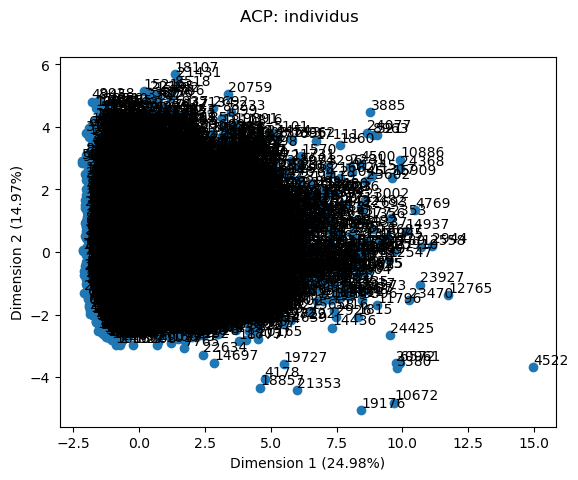

In [34]:
#les coordonnées des individus dans le premier plan factoriel
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

# Calcul des pourcentages des axes en fonction de l'analyse en composantes principales
pr1 = pca.explained_variance_ratio_[0] / np.sum(pca.explained_variance_ratio_)
pr1 = round(pr1 * 100, 2)
pr2 = pca.explained_variance_ratio_[1] / np.sum(pca.explained_variance_ratio_)
pr2 = round(pr2 * 100, 2)

# Boucle pour annoter tous les points avec les noms des individus dans la DataFrame
for i in range(len(X_train_pca)):
    plt.annotate(df_copy.index[i], (X_train_pca[i, 0], X_train_pca[i, 1] + 0.1))

# Modifier les étiquettes des axes x et y pour inclure les pourcentages de variance expliquée
plt.xlabel("Dimension 1 ({}%)".format(pr1))
plt.ylabel("Dimension 2 ({}%)".format(pr2))

# Titre général du graphique
plt.suptitle("ACP: individus")

# Affichage du graphique
plt.show()


Le graphique représente le nuage de points en utilisant les deux premières dimensions (ou composantes principales) de l'analyse en composantes principales (PCA).
En interprétant ce graphique, nous pouvons voir comment les observations dans notre ensemble de données se regroupent en fonction des deux premières dimensions obtenues à partir de l'ACP. On vois que la majorités des régions sont centrés autour de la moyenne.

In [35]:
X_train.shape[1]

12

In [35]:
# le shape de X_train_pca
num_rows, num_columns = X_train_pca.shape

# Printer le nombre de colonnes
print("Number of columns in X_train_pca:", num_columns)


Number of columns in X_train_pca: 9


In [36]:
# Calculer la somme des carrés des coordonnées de chaque individu
di = np.sum(X_train_pca ** 2, axis=1)

# Calculer les COS2 pour chaque individu dans les deux premières dimensions de l'ACP
cos2 = X_train_pca ** 2
for j in range(9):
    cos2[:, j] = cos2[:, j] / di

# Créer un DataFrame pour stocker les COS2 pour chaque individu dans les deux premières dimensions de l'ACP
df_cos2 = pd.DataFrame({'id': X_train.index, 'COS2_1': cos2[:, 0], 'COS2_2': cos2[:, 1]})

# Afficher le DataFrame contenant les COS2 pour chaque individu
df_cos2

id    COS2_1    COS2_2
0       7751  0.044847  0.019113
1      14548  0.125137  0.059131
2       5441  0.115485  0.061356
3      20455  0.179811  0.073609
4      17091  0.052827  0.295667
...      ...       ...       ...
22899  24548  0.033780  0.267290
22900   6207  0.179607  0.356740
22901    996  0.156953  0.069167
22902  17965  0.065350  0.017046
22903  26898  0.098426  0.043014

[22904 rows x 3 columns]

Ce résultat représente la qualité de représentation des individus sur les deux premières dimensions principales en utilisant le carré du cosinus de l'angle entre l'individu et chaque axe principal. Cela donne la proportion de la variance totale expliquée par chaque dimension qui est représentée par chaque individu.
Les valeurs de COS^2 sont comprises entre 0 et 1. Dans notre cas l’individu 3 représente bien le première axe que les autres lignes, et 22900 représente bien le deuxième axe que les autres lignes. 


In [37]:
from sklearn.feature_selection import VarianceThreshold

# Définir le seuil de variance
threshold = 0.1  

# Créer un sélecteur de caractéristiques avec le seuil de variance spécifié
selector = VarianceThreshold(threshold)

# Appliquer le sélecteur aux données d'entraînement
X_train_selected = selector.fit_transform(X_train)

# Afficher les caractéristiques sélectionnées
features_selected = X_train.columns[selector.get_support()]
print("Caractéristiques sélectionnées :", features_selected)


Caractéristiques sélectionnées : Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Cred_length',
       'Home_numerique', 'Intent_numerique', 'Default_numerique',
       'Age_group_numerique', 'income_group_numerique'],
      dtype='object')


# Regression logistique

In [38]:
from sklearn.linear_model import LogisticRegression  # Importation du modèle de régression logistique depuis scikit-learn
from sklearn.metrics import accuracy_score  # Importation de la fonction de calcul de précision depuis scikit-learn

# Régression logistique
model = LogisticRegression()  # Initialisation du modèle de régression logistique
model.fit(X_train_pca, y_train)  # Apprentissage du modèle avec les données d'entraînement réduites par ACP

LogisticRegression()

In [39]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_pca)

# Évaluation de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de la régression logistique avec ACP:", accuracy)

Précision de la régression logistique avec ACP: 0.8368843870066364


La précision de la régression logistique avec ACP est de 83.69%. Cela signifie que le modèle de régression logistique entraîné sur les données d'entraînement réduites par l'ACP a correctement prédit environ 83.69% des étiquettes des données de test. En d'autres termes, sur l'ensemble de test utilisé, environ 83.69% des prédictions du modèle étaient correctes par rapport aux étiquettes réelles.

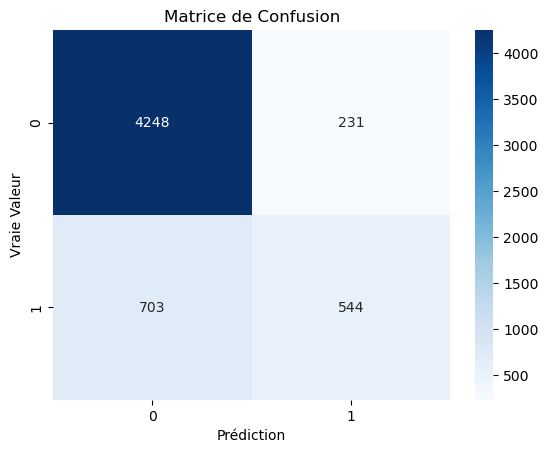

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()


D'après la matrice de confusion, on constate que:
  - TP: (True positive): le nombre d'échantillons positifs que le modèle a correctement classés comme positifs est 544.
  - TN: (True negative): le nombre d'échantillons négatifs que le modèle a correctement classés comme négatifs est 4248.
  - FP: (False positive): ce sont les échantillons négatifs que le modèle a incorrectement classés comme positifs: 231 personnes.
  - FN: (False negative): ce sont les échantillons positifs que le modèle a incorrectement classés comme négatifs: 703 personnes

In [41]:
from sklearn.metrics import mean_absolute_error

# Calculer l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 0.1631156129933636


MAE mesure la différence moyenne entre les classes prédites et les vraies classes.
* la MAE est de 0.1631, ce qui signifie qu'en moyenne, les classes prédites par le modèle diffèrent des vraies classes de 0.1631 sur l'ensemble de test.

In [42]:
from sklearn.metrics import mean_squared_error

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.1631156129933636


L'erreur quadratique moyenne (MSE) est une autre mesure couramment utilisée pour évaluer la performance d'un modèle de régression ou de classification.
 -  le MSE est de 0.1631, ce qui signifie que, en moyenne, les carrés des écarts entre les classes prédites et les vraies classes sont de 0.1631 sur l'ensemble de test.

le fait que la MAE et le MSE aient des valeurs identiques suggère que les prédictions du modèle ont une distribution symétrique autour de la vraie valeur, ce qui est une bonne indication de la qualité des prédictions. 

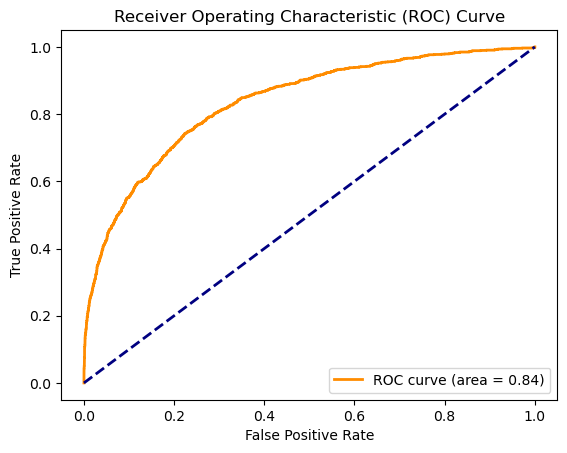

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculer les scores des probabilités pour les classes positives
y_prob = model.predict_proba(X_test_pca)[:, 1]

# Calculer le taux de vrais positifs et le taux de faux positifs
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculer l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Une AUC de 0.84 signifie que le modèle a une bonne capacité de discrimination. En d'autres termes, il y a 84% de chances que le modèle classe correctement une observation aléatoire positive plus haut qu'une observation aléatoire négative

In [44]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score,r2_score,mean_squared_error


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

          Apprentissage      Test
Métrique                         
RMSE           0.402631  0.403876
MAE            0.162111  0.163116
MedAE          0.000000  0.000000
R2             0.043792  0.042474
EVS            0.085631  0.082361


 Les métriques RMSE (0.402631 pour l'apprentissage et 0.403876 pour le test) et MAE (0.162111 pour l'apprentissage et 0.163116 pour le test) sont très proches entre les ensembles d'apprentissage et de test, indiquant une bonne généralisation du modèle. es valeurs de R2 (environ 0.04) et EVS (environ 0.08) sont très basses, indiquant que le modèle n'explique qu'une petite fraction de la variance des données. en guise de conclusion on peut dire que Le modèle est cohérent entre l'apprentissage et le test mais a un faible pouvoir prédictif.

# Clustering: K-means

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centres des clusters: [[-1.15884879 -0.36352133  0.14411672 -0.29945002  0.14898422  0.00870037
   0.02794982  0.06646733 -0.14237096]
 [ 1.72340487 -0.22349411 -0.06918594 -0.28680919  0.08512743  0.01914238
  -0.01829501  0.01729328 -0.11804586]
 [-0.41331872  1.5708914  -0.27161093  1.52259381 -0.62941233 -0.06829449
  -0.04182164 -0.23476867  0.68314357]]


C:\Users\HP PRO\AppData\Local\Temp\ipykernel_5480\3088629745.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], palette='Set2')


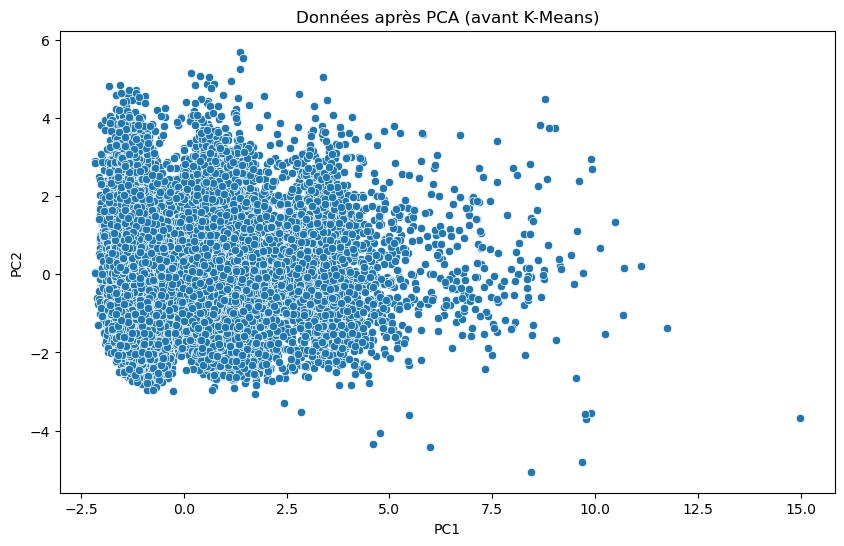

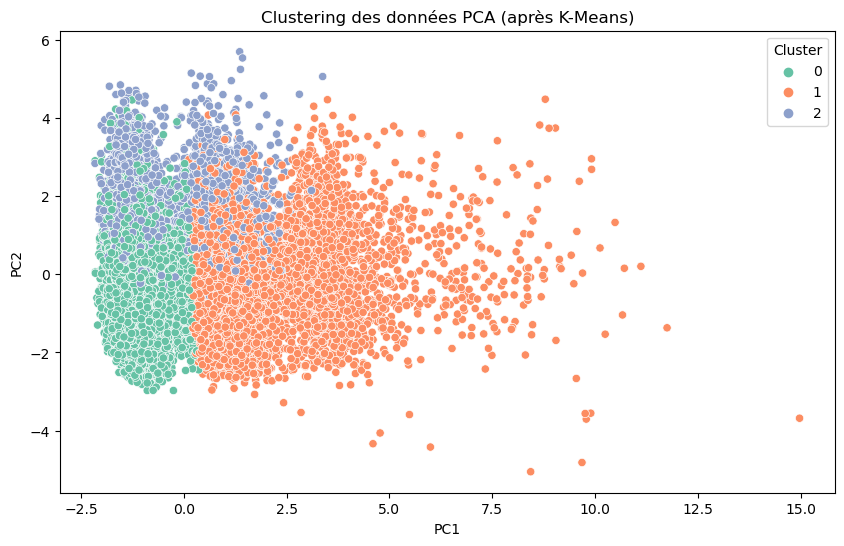

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choisir le nombre de clusters (par exemple, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Appliquer K-Means sur les données PCA
kmeans.fit(X_train_pca)

# Ajouter les labels des clusters aux données PCA
X_train_pca_with_clusters = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_train_pca_with_clusters['Cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centres des clusters:", kmeans.cluster_centers_)

# Visualisation des données après PCA mais avant K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], palette='Set2')
plt.title('Données après PCA (avant K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Visualisation des clusters après K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=X_train_pca_with_clusters, palette='Set2')
plt.title('Clustering des données PCA (après K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# interpertation 

* En premier, on affiche les centres des clusters, on voit bien qu'ils contiennent 9 coordonnées,ce qui correspond au nombre de dimensions dans l'espace des données
* Avant l'application du clustering, les points étaient tous de la même couleur, ce qui signifie qu'ils étaient considérés comme un seul groupe. Alors les données étaient distribuées de manière homogène et qu'il n'y avait pas de séparation évidente entre les points.

*  Après l'application du clustering, les points sont répartis en trois couleurs distinctes, ce qui indique que le modèle de clustering a identifié trois groupes différents dans les données. Chaque couleur représente un cluster de points qui sont similaires entre eux selon les critères utilisés par l'algorithme de clustering.

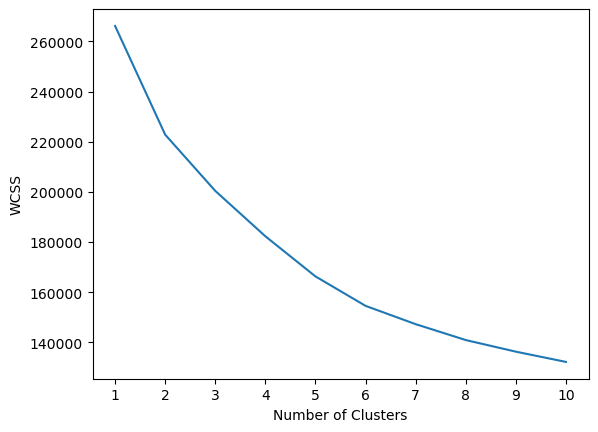

In [47]:
#create list to hold SSE values for each k
# WCSS - the sum of square distances between the centroids and each points.
import warnings

# Ignorer tous les warnings
warnings.filterwarnings("ignore")
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Après l'analyse du graphe (Elbow method), on constate que le coude est identifié à k=2 (number of clusters), ce qui signifie que deux clusters peuvent expliquer une grande partie de la variance dans les données. et que l'ajout de clusters supplémentaires ne serait pas justifié par la structure inhérente des données.

In [48]:
from sklearn.metrics import accuracy_score

# Obtenez les prédictions uniquement pour les échantillons de test
y_pred_test = kmeans.predict(X_test_pca)

# Calculez l'exactitude en comparant les étiquettes prédites pour les échantillons de test avec les étiquettes de test réelles
accuracy = accuracy_score(y_test, y_pred_test)

print("Accuracy of K-Means on test data:", accuracy)


Accuracy of K-Means on test data: 0.14477820468040517


On voit bien que l'exactitude du modèle K-Means est de 0.1439, ce qui signifie que seulement environ 14,47% des points sont correctement attribués à leur cluster d'origine. cela indique que le modèle K-Means ne parvient pas à bien séparer les clusters dans les données.

# CAH 


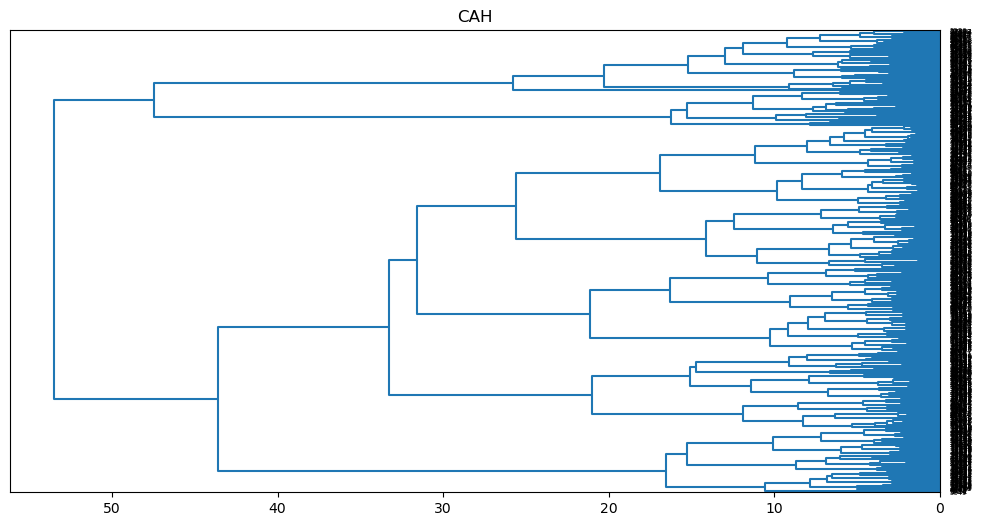

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import numpy as np

# Limit the number of rows
max_rows = 1000  # Set the maximum number of rows you want to keep

# Randomly sample a subset of rows
random_indices = np.random.choice(X_train_pca.shape[0], size=max_rows, replace=False)
X_train_pca_subset = X_train_pca[random_indices]

# Perform hierarchical clustering with the 'ward' method on the subset of rows
Z = linkage(X_train_pca_subset, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=random_indices, orientation='left', color_threshold=0)
plt.title('CAH')
plt.show()


Ce graphe est un dendrogramme qui représente les résultats de la classification hiérarchique agglomérative (CAH) appliquée à vos données.
En analysant ce dendrogramme, nous pouvons identifier les moments où des regroupements significatifs se produisent, indiqués par les hauteurs de fusion. Par exemple, à une hauteur de fusion entre 40 et 50 (ou toute autre valeur donnée), cette mesure représente la distance ou la similarité entre les clusters. À cette valeur spécifique, nous observons une division nette en deux grands groupes distincts. Ces groupes correspondent aux deux principales clusters identifiés par l'algorithme de clustering hiérarchique.

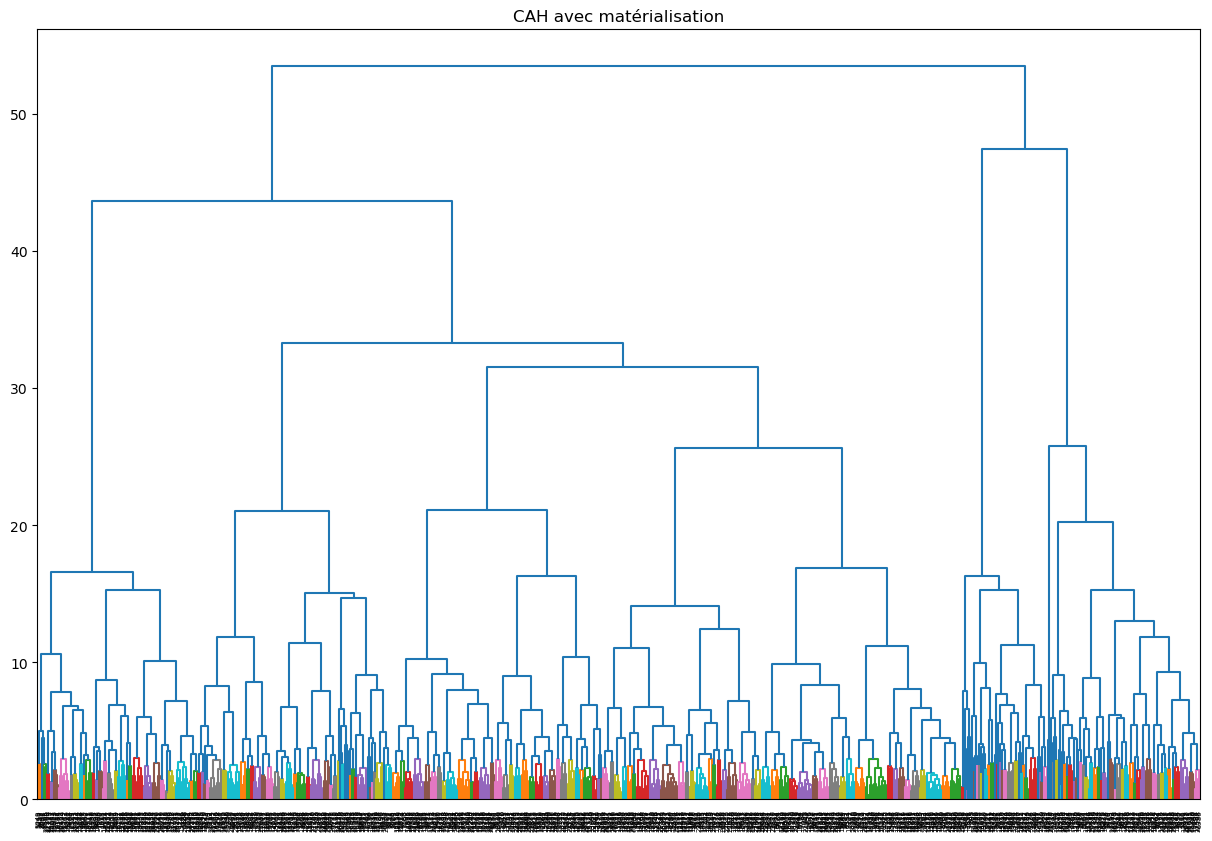

In [50]:
plt.figure(figsize=(15, 10))  # Set the size of the figure

plt.title('CAH avec matérialisation')
dendrogram(Z, labels=random_indices, color_threshold=3)

plt.show()

* La matérialisation (color_threshold) spécifie un seuil de dissimilarité à partir duquel les clusters sont considérés comme distincts. Ainsi, les branches du dendrogramme sont colorées en fonction de ce seuil, ce qui aide à identifier visuellement les clusters distincts dans cet ensemble de données.
* On voit que la couleur est  constante au-delà de la hauteur 5(approximation) ce qui signifie que les échantillons sont suffisamment similaires pour être regroupés dans un même cluster à ce niveau de seuil de dissimilarité.

In [63]:
X_train_pca.shape

(22904, 9)

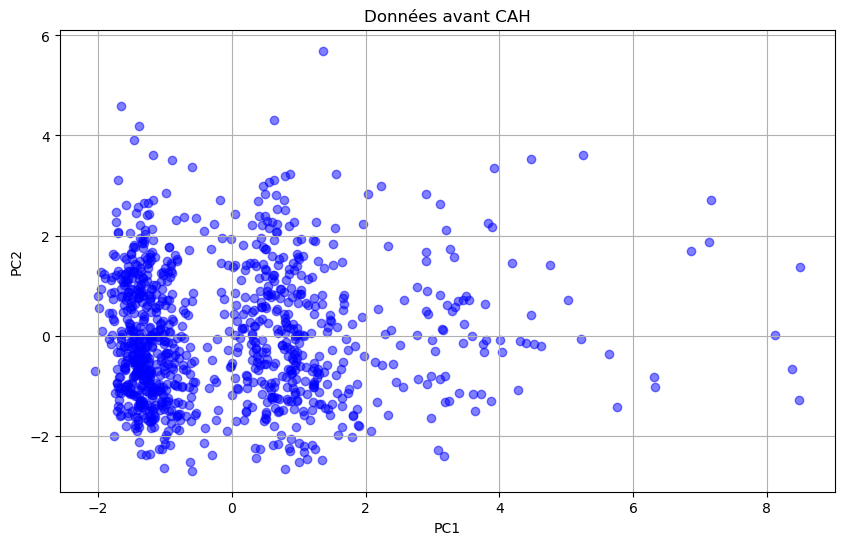

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca_subset[:, 0], X_train_pca_subset[:, 1], c='blue', alpha=0.5)
plt.title('Données avant CAH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

Avant l'application du CAH, les points étaient tous de la même couleur, ce qui signifie qu'ils étaient considérés comme un seul groupe. Alors les données étaient distribuées de manière homogène et qu'il n'y avait pas de séparation évidente entre les points.

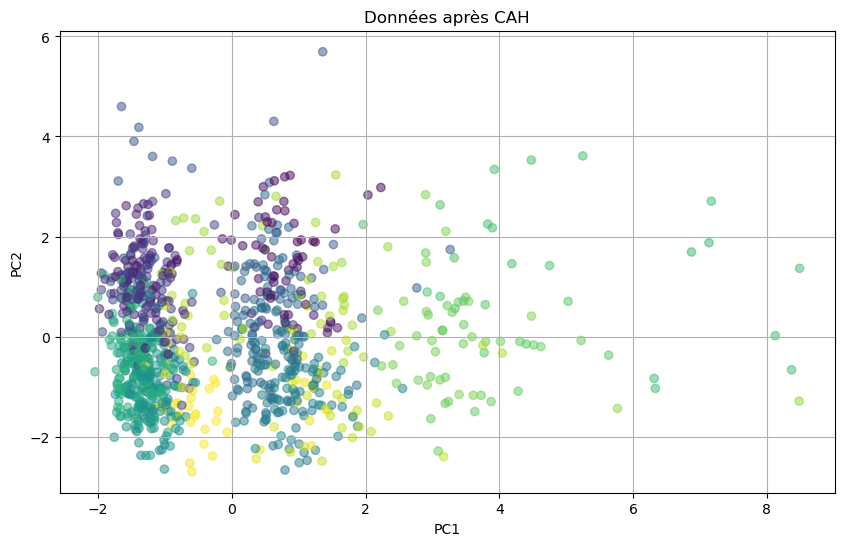

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
plt.figure(figsize=(10, 6))
groupes_cah = fcluster(Z,t=7,criterion='distance')
plt.scatter(X_train_pca_subset[:, 0], X_train_pca_subset[:, 1], c=groupes_cah, alpha=0.5)
plt.title('Données après CAH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



Ici,les points sont colorés en fonction des groupes attribués par l'algorithme CAH. Chaque couleur représente un groupe différent, ce qui indique comment les données ont été regroupées en clusters distincts en fonction de leurs similarités dans l'espace des deux premières composantes principales (PC1 et PC2)

In [71]:
import numpy as np
from sklearn.metrics import silhouette_score

sample_size = 1000 
if len(X_train_pca) > sample_size:
    indices = np.random.choice(len(X_train_pca), sample_size, replace=False)
    X_sample = X_train_pca[indices]
    labels_sample = kmeans.labels_[indices]
else:
    X_sample = X_train_pca
    labels_sample = kmeans.labels_

silhouette_avg = silhouette_score(X_sample, labels_sample)
print("Silhouette Score after Hierarchical Clustering (sampled):", silhouette_avg)


Silhouette Score after Hierarchical Clustering (sampled): 0.12545331301137233


On voit que :le score de silhouette est proche de 0 indique que les clusters se chevauchent et que les points peuvent être attribués à plusieurs clusters, ce qui suggère une partition moins claire des données.

# MODELE D'ARBRE DE DECISION 

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree ,export_text

Construction de l'arbre

In [73]:
# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

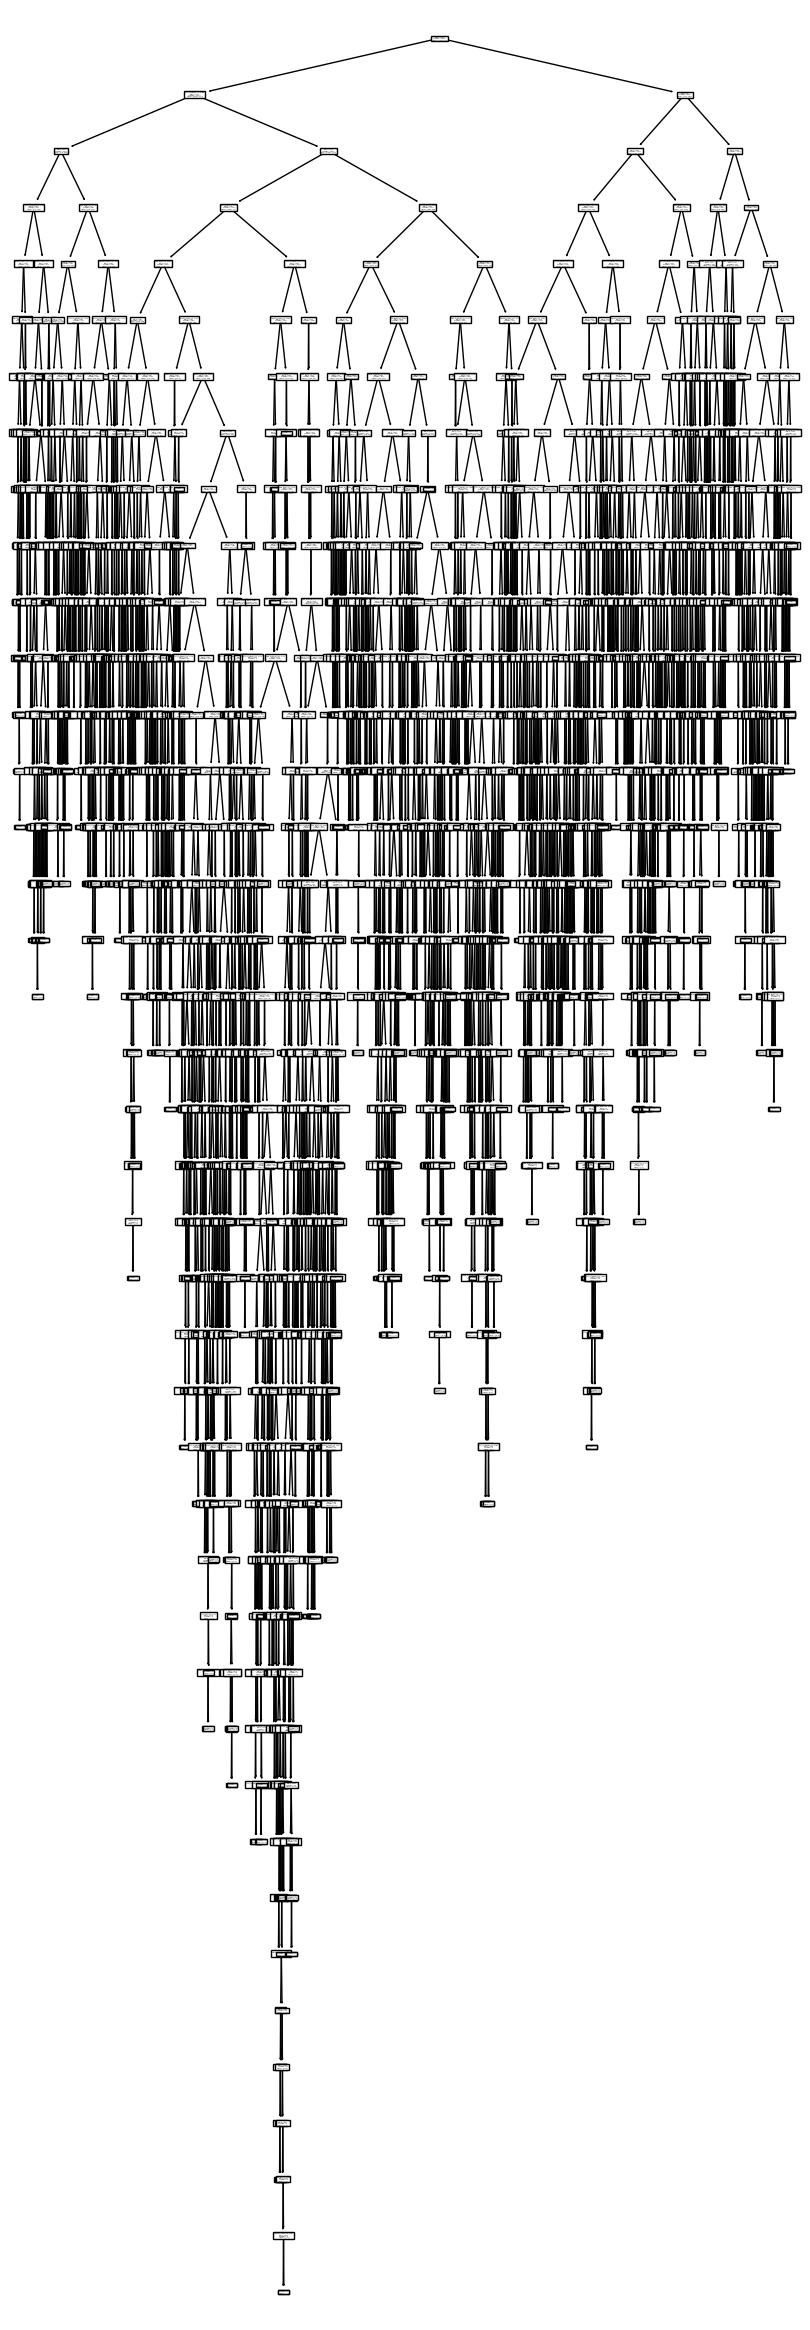

In [76]:
plt.figure(figsize=(10,30))
plot_tree(tree, feature_names=X.columns.tolist())
plt.show()

In [77]:
importances_pca = tree.feature_importances_

components_names = ['Component_{}'.format(i+1) for i in range(len(importances_pca))]
# Créer un DataFrame pour afficher l'importance des composantes principales
importance_df_pca = pd.DataFrame({'Component': components_names, 'Importance': importances_pca})
# Trier le DataFrame par importance décroissante
importance_df_pca = importance_df_pca.sort_values(by='Importance', ascending=False)
# Afficher l'importance des composantes principales
importance_df_pca

Component  Importance
1  Component_2    0.275701
8  Component_9    0.114098
5  Component_6    0.101216
2  Component_3    0.095241
7  Component_8    0.087960
4  Component_5    0.086116
3  Component_4    0.085640
6  Component_7    0.084255
0  Component_1    0.069773

In [78]:
from sklearn.metrics import accuracy_score

# Prédire les étiquettes sur l'ensemble de test PCA
y_pred_tree = tree.predict(X_test_pca)

# Évaluer la précision du modèle sur les données PCA
accuracy_tree_pca = accuracy_score(y_test, y_pred_tree)
print("Précision de l'arbre de décision avec PCA:", accuracy_tree_pca)

Précision de l'arbre de décision avec PCA: 0.8229130282920014


La précision de l'arbre de décision avec PCA est indiquée par le chiffre 0.8229130282920014. Cette précision représente la capacité du modèle d'arbre de décision à prédire correctement les résultats sur de nouvelles données après avoir utilisé l'ACP pour réduire la dimensionnalité des données.
En général, une précision de 0.82 est considérée comme assez bonne, cela signifie que le modèle est capable de prédire correctement les résultats dans environ 82% des cas.

# Comparaison

La régression logistique avec ACP offre la meilleure précision (0.8369), suivie par l’arbre de décision avec PCA (0.8229). Ces deux méthodes semblent les plus prometteuses pour la tâche de classification. cependant  Le score de silhouette du clustering hiérarchique (0.125) est relativement faible, indiquant une mauvaise performance pour cette tâche. K-Means affiche une précision très faible (0.1703), suggérant qu'il est peu adapté pour cette tâche de classification spécifique.

 Pour évaluer la probabilité de défaut de paiement pour les demandeurs de prêts, il est recommandé d’utiliser la régression logistique avec ACP en raison de sa haute précision et de son efficacité. L’arbre de décision avec PCA pourrait également être une option viable, surtout si l’interprétabilité du modèle est importante.